## Первичная обработка данных

Возьмем данные с соревнования kaggle о продаже домов, исследуемой величиной будет являться **SalePrice** (цена продажи). 

In [21]:
import pandas as pd
data = pd.read_csv('train.csv')

In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
y = data.SalePrice

Изобразим наши данные на двумерном графике, где по оси *y* будет расположена цена, а по оси *x* - индекс.

<AxesSubplot:ylabel='SalePrice'>

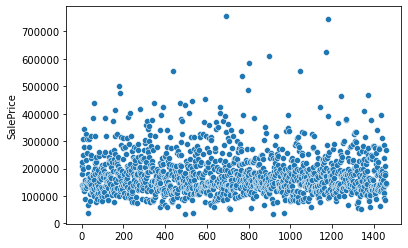

In [24]:
import seaborn as sns
sns.scatterplot(x = y.index, y = y)

Мы уже можем заметить выбросы - выбивающиеся из общего паттерна поведения значения исследуемой величины. 

Посмотри на распределение данных:

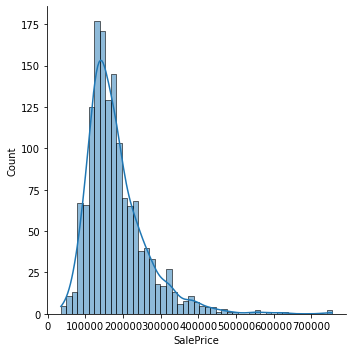

In [25]:
sns.displot(y, kde=True)

Распределение явно отклонено от нормального, так как оно не симметрично и слишком вытянуто. Тогда будем использовать методики удаления выброса для произвольной случайной величины.

Давайте удалим их с помощью с помощью интерквантильного расстояния. Посчитаем первый и третий квартили, а также межквартильный размах. 

In [26]:
import numpy as np
q25 = np.percentile(y, 25)
q75 = np.percentile(y, 75)
IQR = q75 - q25
print(f'Первый квартиль имеет значение {q25}')
print(f'Третий квартиль имеет значение {q75}')
print(f'Межквартильное расстояние имеет значение {IQR}')

Первый квартиль имеет значение 129975.0
Третий квартиль имеет значение 214000.0
Межквартильное расстояние имеет значение 84025.0


Давайте возьмем *k* равной 1.5. Тогда верхняя и нижняя граница будут равны: 

In [27]:
thehighest = q75 + (IQR * 1.5)
thelowest = q25 - (IQR * 1.5)
print(f'Нижняя граница имеет значение {thelowest}')
print(f'Верхняя имеет значение {thehighest}')

Нижняя граница имеет значение 3937.5
Верхняя имеет значение 340037.5


Удалим выбросы и посмотрим на распределение еще раз:

было удалено 61 значение


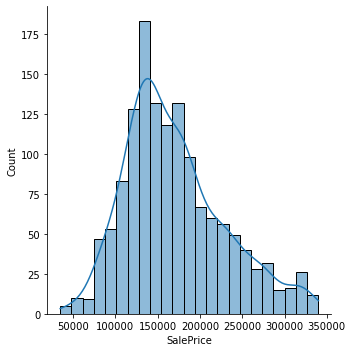

In [30]:
print(f'было удалено {y[y > thehighest].shape[0] + y[y < thelowest].shape[0]} значение')
y = y.drop(y[(y > thehighest)|(y < thelowest)].index)
sns.displot(y, kde=True)

Распределение стало больше походить на нормальное. Построим qqplot, чтобы сделать более точный вывод 

/Users/mariaisrafilova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


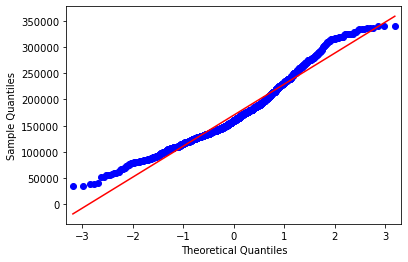

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(y, line ='s')
plt.show()

Я считаю, что распределение довольно сильно отличается от Гауссовского.

Посчитаем моду, медиану, среднее и вообще все-все статистические характеристики выборки с помощью одной функции:) 

In [32]:
y.describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

Можно заметить, что максимальное значение теперь не сильно отклоняется от 3-го квартиля